In [1]:
# %%

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import math

In [2]:
# %%

df = pd.read_csv("compiled_data.csv")
df

,Angle of Repose,Length to Width Ratio,Coeff of Friction,Density,Volume,Length to Width Standard Deviation,Coeff of Friction STDV
0,34.606730,1.385,0.583,0.308,0.176,0.267,0.047
1,36.322610,1.385,0.583,0.308,0.176,0.267,0.047
2,36.199330,1.385,0.583,0.308,0.176,0.267,0.047
3,33.553664,1.385,0.583,0.308,0.176,0.267,0.047
4,27.757558,1.385,0.583,0.308,0.176,0.267,0.047
5,30.388623,1.385,0.583,0.308,0.176,0.267,0.047
6,33.082217,1.385,0.583,0.308,0.176,0.267,0.047
7,31.415963,1.385,0.583,0.308,0.176,0.267,0.047
8,34.388319,1.385,0.583,0.308,0.176,0.267,0.047
9,32.498400,1.385,0.583,0.308,0.176,0.267,0.047


In [3]:
# %%

from scipy import stats

ys = list(df["Angle of Repose"])
print(ys)

[34.60672996, 36.32260965, 36.19932975, 33.55366409, 27.75755803, 30.38862335, 33.0822167, 31.4159626, 34.38831916, 32.49840012, 35.7989586, 38.0747021, 33.35492952, 36.02243746, 41.2752557, 40.64969936, 37.90624473, 31.65448594, 31.75645369, 32.99034355, 29.19666208, 32.05451935, 45.62716518, 39.69218689, 47.71632675, 40.13014067, 28.13541123, 30.65704837, 36.12470421, 34.42135974, 46.40319107, 37.41770638, 47.87072985, 32.67911827, 31.50191128, 33.80799794, 43.77582618, 52.38223695, 41.61802109, 50.52731892]


In [4]:
# %%

z_scored_ys = stats.zscore(ys)

In [5]:
# %%

xs = []
for i in range(1, len(list(df.iloc[1:,]))):
    xs.append([list(df.iloc[i - 1 :, i])[j] for j in range(0, 40, 10)])
# for i in range(len(xs)):
#     xs[i]=[val**0.25 for val in xs[i]]
zd_xs = [list(stats.zscore(x)) for x in xs]

In [6]:
# %%

new_skeleton = [[] for i in range(len(xs))]
for i, column in enumerate(zd_xs):
    print(column)
    for cell in column:
        for j in range(10):
            new_skeleton[i].append(cell)

[1.6287041242098066, -0.02562006487520923, -0.6258615848087096, -0.9772224745258814]
[-0.47964309423997037, -1.3251156671375401, 0.4633840062996306, 1.3413747550778798]
[1.626419727140408, 0.019134349731063642, -0.8074695586508853, -0.8380845182205872]
[-0.7001830128149725, -0.6518941738306104, -0.3657678607192577, 1.7178450473648406]
[1.6673822292663898, -0.8995842267863351, -0.14324589598508583, -0.6245521064949715]
[0.042144975196109, 0.8850444791182878, 0.7164645783338518, -1.6436540326482498]


In [7]:
# %%

zd_df = pd.DataFrame(
    {
        "Angle of Repose": z_scored_ys,
        "Length to Width Ratio": new_skeleton[0],
        "Coeff of Friction": new_skeleton[1],
        "Density": new_skeleton[2],
        "Volume": new_skeleton[3],
        "Length to Width Ratio s.d": new_skeleton[4],
        "Coeff of Friction s.d": new_skeleton[5],
    }
)
zd_df

,Angle of Repose,Length to Width Ratio,Coeff of Friction,Density,Volume,Length to Width Ratio s.d,Coeff of Friction s.d
0,-0.354489,1.628704,-0.479643,1.626420,-0.700183,1.667382,0.042145
1,-0.075366,1.628704,-0.479643,1.626420,-0.700183,1.667382,0.042145
2,-0.095420,1.628704,-0.479643,1.626420,-0.700183,1.667382,0.042145
3,-0.525793,1.628704,-0.479643,1.626420,-0.700183,1.667382,0.042145
4,-1.468650,1.628704,-0.479643,1.626420,-0.700183,1.667382,0.042145
5,-1.040652,1.628704,-0.479643,1.626420,-0.700183,1.667382,0.042145
6,-0.602483,1.628704,-0.479643,1.626420,-0.700183,1.667382,0.042145
7,-0.873534,1.628704,-0.479643,1.626420,-0.700183,1.667382,0.042145
8,-0.390018,1.628704,-0.479643,1.626420,-0.700183,1.667382,0.042145
9,-0.697453,1.628704,-0.479643,1.626420,-0.700183,1.667382,0.042145


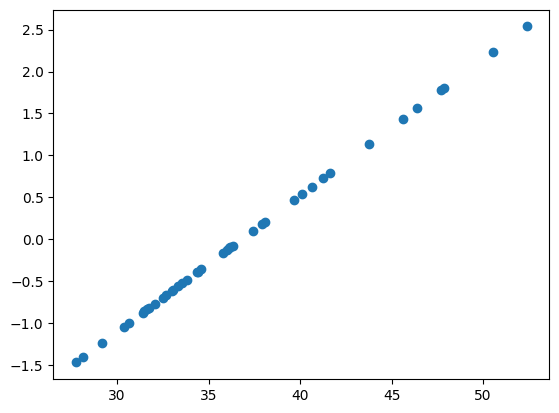

In [8]:
# %%

plt.scatter(df["Angle of Repose"], zd_df["Angle of Repose"])
plt.show()

In [9]:
# %%

y = zd_df["Angle of Repose"]
X = zd_df.drop(["Angle of Repose"], axis=1).astype("float64")

0.34918639665140383
-1.4134315645566442
-0.12627692273453262
-2.5759636725987187
-0.36628937197519584
-0.6988777416885443
0.2897306069729336
0.3347619602376334
0.5691981346747665
0.4843629206418911
Median Score: 0.0817268421192005
0.8947789011670577


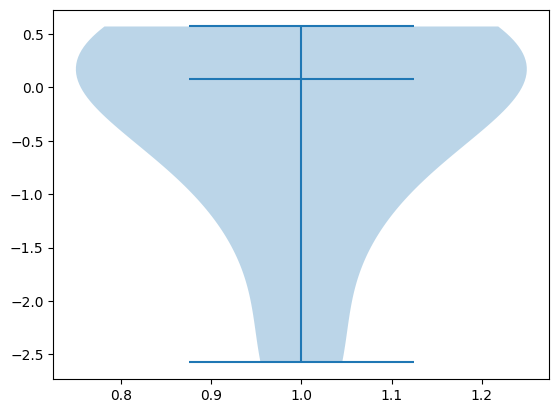

In [10]:
# %%

from sklearn.linear_model import LassoCV, Lasso

avg_error = 0
model_scores = []
all_coeffs = []
for i in range(0, 10):
    X_train = X.drop([(i + j * 10) for j in range(4)])
    y_train = y.drop([(i + j * 10) for j in range(4)])
    X_test = X.drop(X_train.index)
    y_test = y.drop(y_train.index)
    model = LassoCV(cv=len(X_train), random_state=10, max_iter=100000)
    model.fit(X_train, y_train)
    lasso_best = Lasso(alpha=model.alpha_)
    lasso_best.fit(X_train, y_train)
    error = mean_squared_error(y_test, lasso_best.predict(X_test))
    avg_error += error
    coeffs = list(
        lasso_best.coef_,
    )
    all_coeffs.append(coeffs)
    test_score = lasso_best.score(X_test, y_test)
    train_score = lasso_best.score(X_train, y_train)
    model_scores.append(test_score)
    print(test_score)
avg_error /= 10
print("Median Score:", np.median(np.array(sorted(model_scores))))
print(avg_error)

plt.violinplot(model_scores, showmedians=True)
plt.show()

In [11]:

grouped_coeffs = [[] for i in range(len(all_coeffs[0]))]
for i in range(len(all_coeffs[0])):
    for coeffs in all_coeffs:
        grouped_coeffs[i].append(coeffs[i])

print(grouped_coeffs)

[[-0.22880749223691435, -0.20364612320792652, -0.0, -0.027922221478485092, -0.0, -0.05609576373378173, -0.2106125996060697, -0.19413506589345356, -0.06935707857016508, -0.12271626233322082], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0], [0.21132636892762433, 0.3057436706907963, 0.3217482037138707, 0.4492140417714997, 0.4990658879907395, 0.4583446496336862, 0.24047404405261577, 0.17937317308149367, 0.33943679463184806, 0.2594215909248085], [-0.0, -0.0, -0.1627434659411375, -0.12725270400540634, -0.04306412279113844, -0.056668897564258074, -0.0, -0.02994141215631109, -0.14582493724405501, -0.09830026488718077], [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]]


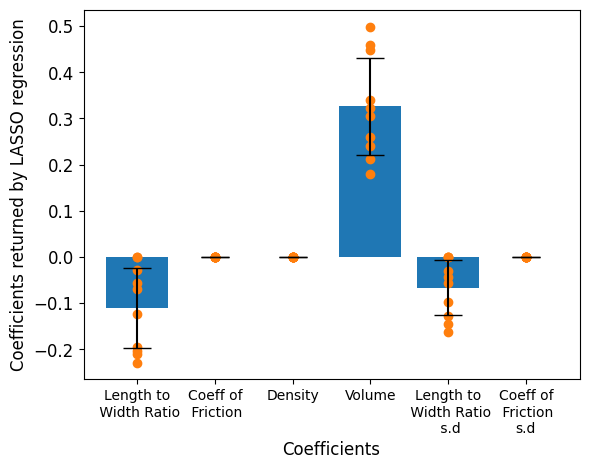

In [12]:
import re
plt.rcParams.update({"font.size": 12})
labels = list(X.columns)
labels[-1]="Coeff of Friction\ns.d"
labels = [re.sub(r'(\s\S*?)\s', r'\1\n ',label) for label in labels]
avg_coeffs = [np.mean(np.array(coeff)) for coeff in grouped_coeffs]
coeffs_std = [np.std(np.array(coeff)) for coeff in grouped_coeffs]
plt.bar(labels, avg_coeffs, yerr=coeffs_std, capsize=10)
plt.scatter(
    [label for label in labels for i in range(10)],
    [coeff for group in grouped_coeffs for coeff in group],
)
plt.xlabel("Coefficients")
plt.ylabel("Coefficients returned by LASSO regression")
plt.yticks(fontsize=12)
plt.xticks(fontsize=10)
plt.show()